In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold



#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model

In [3]:
data = pd.read_csv("creditcard.csv")

###Analyzing the dataset


In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.shape

(284807, 31)

In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
#Calculating percentage of fraud compared to legitimate transactions
fraud = data.groupby(['Class']).size()[1]
percentage = fraud/(data.shape[0]) * 100
print("The percentage of fraudulent transactions in the entire dataset is: %5.5f" %  percentage)

The percentage of fraudulent transactions in the entire dataset is: 0.17275


###Viewing relationship between features like Time, Amount and Class



In [9]:
vis_data = data[['Time','Amount','Class']]

In [10]:
vis_data.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


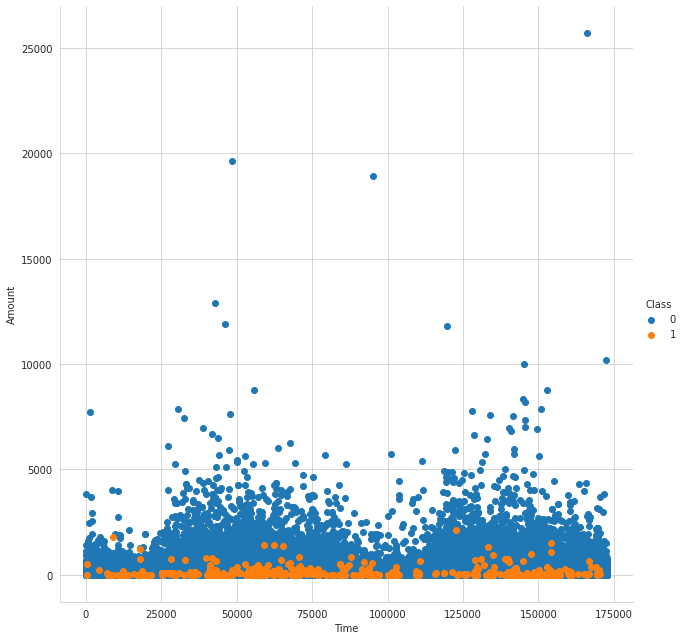

In [11]:
sns.set_style("whitegrid")
plot1 = sns.FacetGrid(data, hue="Class", size = 9)
plot1.map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Outlier Detection and Removal


In [12]:
data_modified = pd.DataFrame(data[data["Amount"] <=5000])

In [13]:
data_modified.shape

(284752, 31)

In [14]:
print("No.of Outliers removed :" ,data.shape[0]-data_modified.shape[0])

No.of Outliers removed : 55


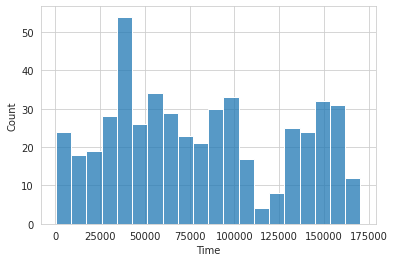

In [15]:
#Checking the Time feature relationship
sns.histplot(data["Time"][data["Class"]==1], bins = 20 )

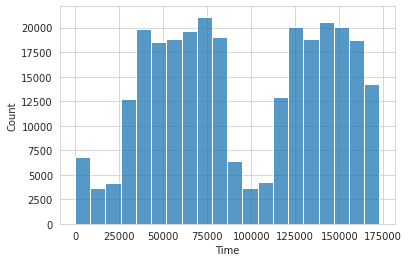

In [16]:
sns.histplot(data["Time"][data["Class"]==0], bins = 20 )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


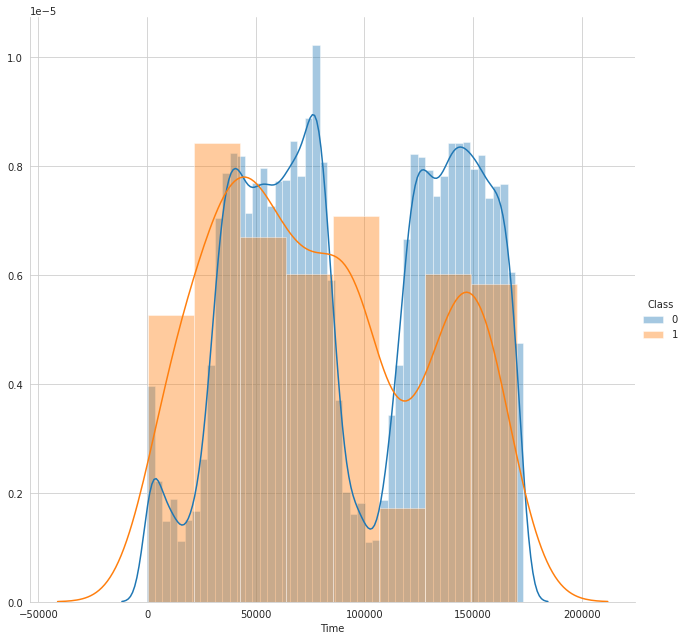

In [17]:
sns.set_style("whitegrid")
plot2 = sns.FacetGrid(data, hue="Class", size = 9)
plot2.map(sns.distplot, "Time").add_legend()
plt.show()

In [18]:
data_modified.drop(["Time"],axis = 1,inplace = True)

In [19]:
data_modified.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Standardizing the Amount feature

In [20]:
scaler = StandardScaler()
data_modified["Amount"] = scaler.fit_transform(data_modified["Amount"].values.reshape(-1,1))

In [21]:
data_modified.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.284716,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.382029,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.324064,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.166188,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.076632,0


Splitting dataset without Random Sampling

In [22]:
X = data_modified.drop(["Class"],axis = 1)
y = data_modified["Class"]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227801, 29)
(227801,)
(56951, 29)
(56951,)


Random over sampling


In [25]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [26]:
X_smote,y_smote = SMOTE().fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
print(X_smote.shape)
print(y_smote.shape)

(568520, 29)
(568520,)


In [28]:
from collections import Counter
count = Counter(y_smote)
print(count)

Counter({0: 284260, 1: 284260})


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.2 , random_state = 0)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(454816, 29)
(454816,)
(113704, 29)
(113704,)


Under Sampling

In [31]:
from imblearn.under_sampling import RandomUnderSampler

random_undersampler = RandomUnderSampler(sampling_strategy = 0.5)
X_undersample,y_undersample = random_undersampler.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
count2 = Counter(y_undersample)
print(count2)

Counter({0: 984, 1: 492})


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_undersample,y_undersample,test_size = 0.2 , random_state = 0)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1180, 29)
(1180,)
(296, 29)
(296,)


###Training Multi-layer perceptron with 2 hidden layers


In [35]:
#Training Multi-layer perceptron with 2 hidden layers
n_inputs = X_train.shape[1]
es= keras.callbacks.EarlyStopping(monitor='loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model = Sequential()
Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/40
2/2 - 1s - loss: 3.0940 - accuracy: 0.4992 - val_loss: 2.0828 - val_accuracy: 0.4595
Epoch 2/40
2/2 - 0s - loss: 2.7454 - accuracy: 0.4975 - val_loss: 1.5529 - val_accuracy: 0.4358
Epoch 3/40
2/2 - 0s - loss: 2.4060 - accuracy: 0.5068 - val_loss: 1.0740 - val_accuracy: 0.4662
Epoch 4/40
2/2 - 0s - loss: 1.9839 - accuracy: 0.5297 - val_loss: 0.7396 - val_accuracy: 0.5709
Epoch 5/40
2/2 - 0s - loss: 1.8154 - accuracy: 0.5415 - val_loss: 0.5839 - val_accuracy: 0.6588
Epoch 6/40
2/2 - 0s - loss: 1.6586 - accuracy: 0.5364 - val_loss: 0.5313 - val_accuracy: 0.6757
Epoch 7/40
2/2 - 0s - loss: 1.5573 - accuracy: 0.5661 - val_loss: 0.5091 - val_accuracy: 0.6858
Epoch 8/40
2/2 - 0s - loss: 1.2965 - accuracy: 0.5831 - val_loss: 0.4952 - val_accuracy: 0.7061
Epoch 9/40
2/2 - 0s - loss: 1.1432 - accuracy: 0.6025 - val_loss: 0.4822 - val_accuracy: 0.7162
Epoch 10/40
2/2 - 0s - loss: 1.0002 - accuracy: 0.6373 - val_loss: 0.4685 - val_accuracy: 0.7264
Epoch 11/40
2/2 - 0s - loss: 0.9636 - a

In [36]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65)                1950      
_________________________________________________________________
dropout (Dropout)            (None, 65)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 65)                4290      
_________________________________________________________________
dropout_1 (Dropout)          (None, 65)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 66        
Total params: 6,306
Trainable params: 6,306
Non-trainable params: 0
_________________________________________________________________


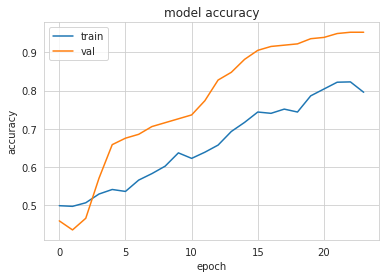

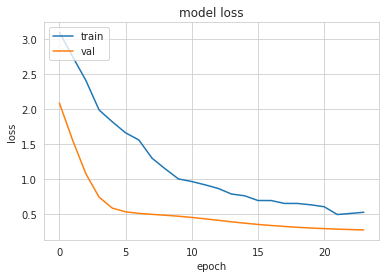

In [37]:
# summarize history for accuracy
plt.plot(his_mod2.history['accuracy'])
plt.plot(his_mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
print('Accuracy: '+ str(Model.evaluate(X_test,y_test)[1]))
print('Loss value: '+ str(Model.evaluate(X_test,y_test)[0]))

Y_mod2_pred = Model.predict_classes(X_test, batch_size=200, verbose=0)
print('Recall_score: ' + str(recall_score(y_test,Y_mod2_pred)))
print('Precision_score: ' + str(precision_score(y_test, Y_mod2_pred)))
print('F-score: ' + str(f1_score(y_test,Y_mod2_pred)))


10/10 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.9493
Accuracy: 0.9493243098258972
10/10 [==============================] - 0s 1ms/step - loss: 0.2842 - accuracy: 0.9493
Loss value: 0.2842499613761902
Recall_score: 0.8787878787878788
Precision_score: 0.9666666666666667
F-score: 0.9206349206349207


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion Matrix 

[[194   3]
 [ 12  87]] 



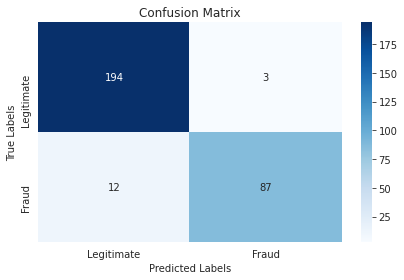

In [44]:
print("Confusion Matrix \n")
cm_neu = confusion_matrix(y_test,Y_mod2_pred)
print(cm_neu,"\n")
df_cm_neu = pd.DataFrame(cm_neu, columns= ['Legitimate','Fraud'], index = ['Legitimate','Fraud'])
sns.heatmap(df_cm_neu,cmap='Blues',annot=True,fmt = 'g')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()

In [45]:
print("Classification Report \n")
print(classification_report(y_test,Y_mod2_pred))

Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       197
           1       0.97      0.88      0.92        99

    accuracy                           0.95       296
   macro avg       0.95      0.93      0.94       296
weighted avg       0.95      0.95      0.95       296



In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


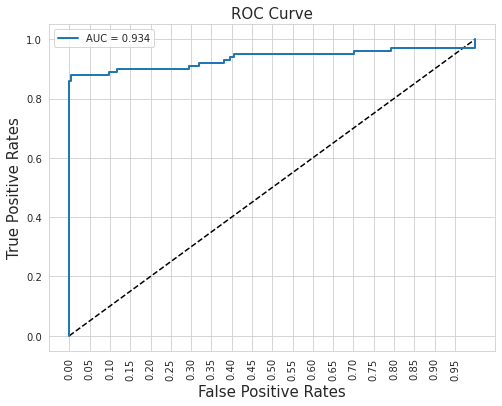

In [47]:
neunet_pred_probabilities_fraud3 = Model.predict_proba(X_test).ravel()
 #predicting the probability of occurance of 1
fpr3,tpr3,threshold3 = roc_curve(y_test,neunet_pred_probabilities_fraud3)
neunet_auc3 = roc_auc_score(y_test, neunet_pred_probabilities_fraud3)
plot_roc_curve(fpr=fpr3, tpr=tpr3, label="AUC = %.3f" % neunet_auc3)